# Lecture 35 - Example
What is the mass flow rate out of a nozzle for a compressible fluid?

In [37]:
# Boiler plate
import numpy as np
import matplotlib.pyplot as plt

## Constants and Functions

In [38]:
# Constants
R = 8.314 # J/mol K
M = 28.97e-3 # air, kg/mol
gamma = 1.4 # Cp/Cv, ideal gas
g = 9.807 # m/s^2

# speed of sound
def c(T):
    return np.sqrt(gamma*R*T/M)

# ideal gas equation of state
def rho(P, T):
    return M*P/(R*T)

# Temperature (Need stagnation temperature)
def T(T0, Ma):
    return T0*(1 + (gamma-1)/2*Ma**2)**(-1)

# Pressure (Need stagnation pressure)
def P(P0, Ma):
    return P0*(1 + (gamma-1)/2*Ma**2)**(-gamma/(gamma-1))

## Calculate the Mass Flow Rate

In [42]:
# Tank properties
T0 = 350 # K
P0 = 4.0e6 # Pa
c0 = c(T0)
rho0 = rho(P0, T0)

# Nozzle properties
D = 1e-2 # m
A = np.pi*D**2/4

# Mach number
Ma = np.linspace(0, 1, 101)

# mass flow rate: w = rho*v*A = rho*Ma*c*A
T1 = T(T0, Ma)
P1 = P(P0, Ma)
c1 = c(T1)
rho1 = rho(P1, T1)
w = rho1*Ma*c1*A

# Mass flow rate of critical point (@ Ma = 1)
Ma_star = 1 # 0.783659
T_star = T(T0, Ma_star)
P_star = P(P0, Ma_star)
c_star = c(T_star)
rho_star = rho(P_star, T_star)
w_star = rho_star*Ma_star*c_star*A

print('P0 = %5f (MPa)'%(P0/1e6))
print('P_star = %5f (MPa)'%(P_star/1e6))
print('c_star = %5f (m/s)'%c_star)
print('w_star =  %5f (kg/s)'%w_star)
print('w_max  %5f (kg/s)'%np.amax(w))

P0 = 4.000000 (MPa)
P_star = 2.113127 (MPa)
c_star = 342.324655 (m/s)
w_star =  0.678743 (kg/s)
w_max  0.678743 (kg/s)


## Plot the flow rate as a function of $\Delta P$

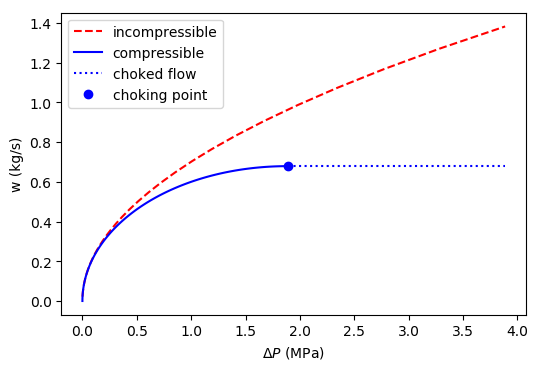

In [47]:
# Flow rate of an incompressible fluid
DP_inc = np.logspace(3, np.log10(1.5*P0-P_star))
w_inc = A*np.sqrt(2*rho0*DP_inc)

plt.figure(dpi=100)
plt.plot(DP_inc/1e6, w_inc, 'r--', label='incompressible')
plt.plot((P0-P1)/1e6, w, 'b', label='compressible')
plt.plot([(P0-P_star)/1e6, (1.5*P0-P_star)/1e6], 
         [w_star, w_star], 'b:', label='choked flow')
plt.plot((P0-P_star)/1e6, w_star, 'bo', label='choking point')
plt.xlabel('$\Delta P$ (MPa)')
plt.ylabel('w (kg/s)')
plt.legend()
plt.show()